In [ ]:
#import the necessary libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

import os
print(os.listdir("../content/sample_data"))
# read the data from file
housing = pd.read_csv("../content/sample_data/california_housing_train.csv")

['anscombe.json', 'README.md', 'california_housing_train.csv', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_test.csv']


In [ ]:
# Apply Box-Cox transformation to numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


housing_boxcox = housing.copy()  # Create a copy of the original DataFrame
for feature in numerical_features:
    # Add a small constant value to ensure all values are positive
    min_value = housing_boxcox[feature].min()
    constant = 1 - min_value if min_value <= 0 else 0
    housing_boxcox[feature] += constant

    # Apply Box-Cox transformation
    housing_boxcox[feature], _ = boxcox(housing_boxcox[feature])


longitude


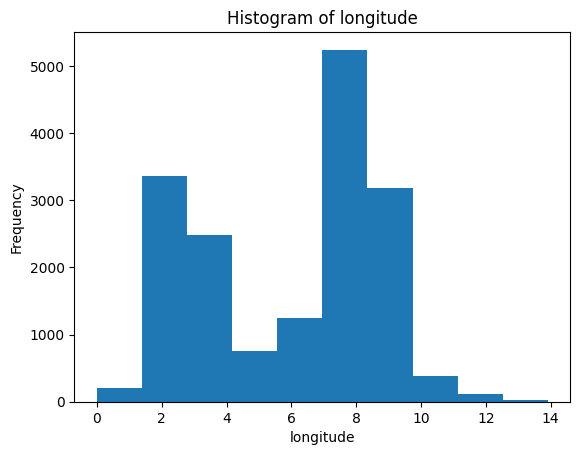

latitude


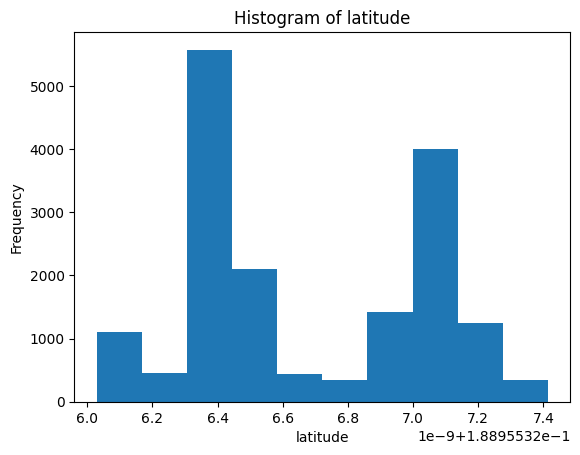

housing_median_age


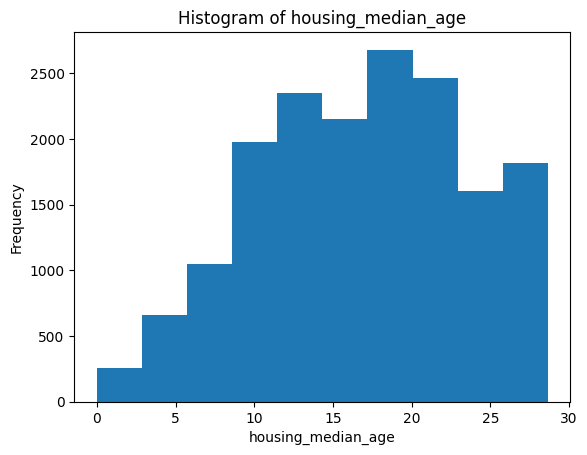

total_rooms


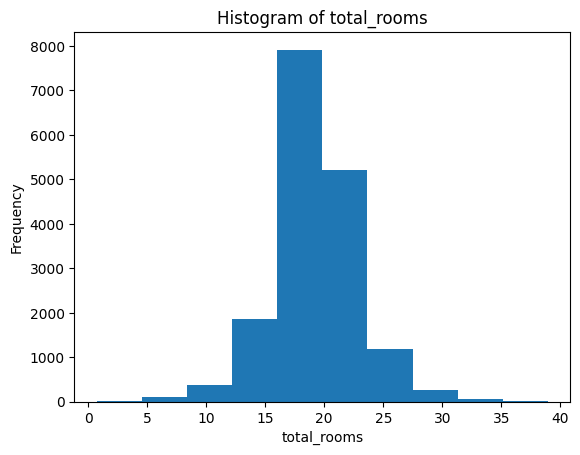

total_bedrooms


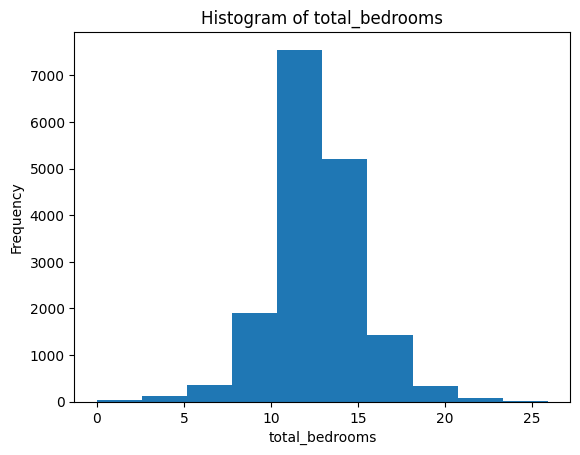

population


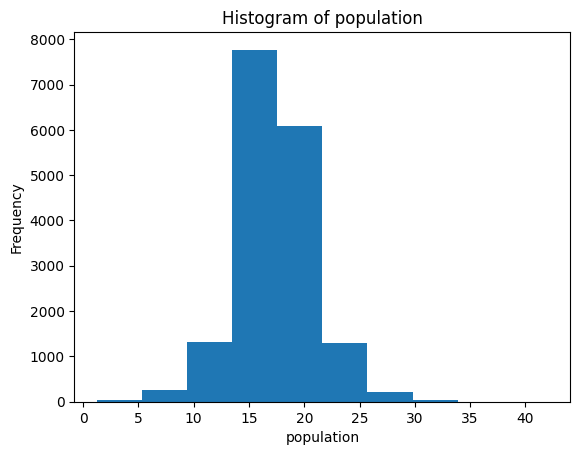

households


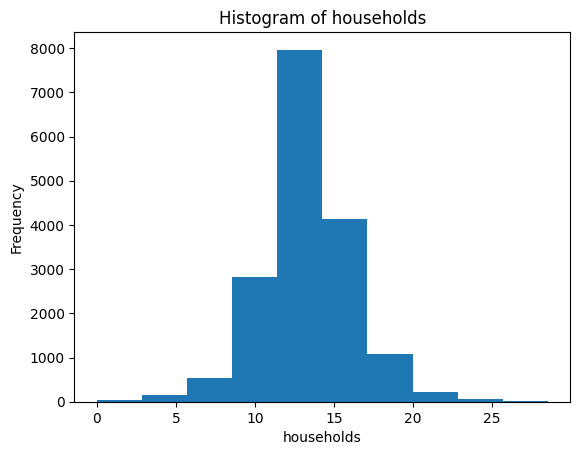

median_income


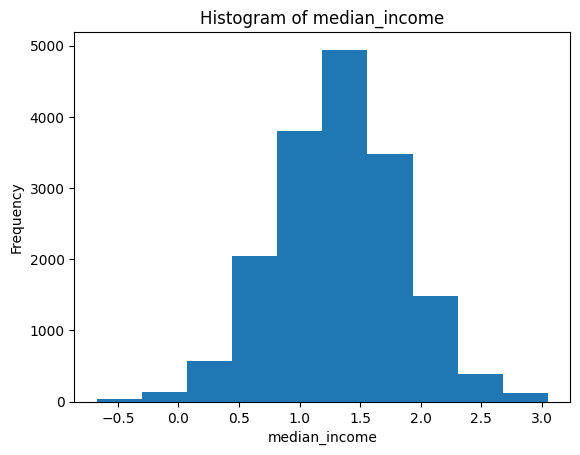

median_house_value


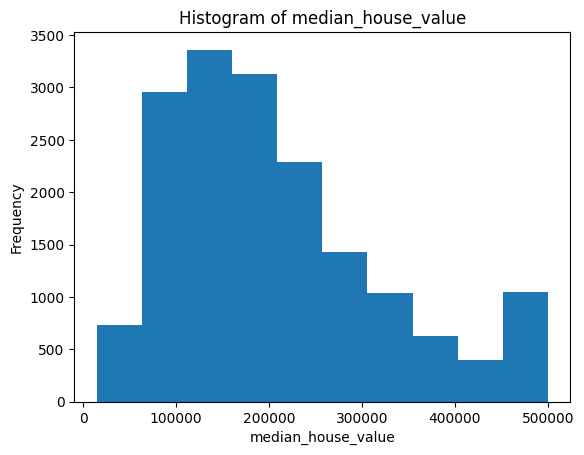

In [ ]:
# Univariate analysis - Histograms distributions
for column in housing_boxcox.columns:
    plt.figure()
    print (column)
    housing_boxcox[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

longitude


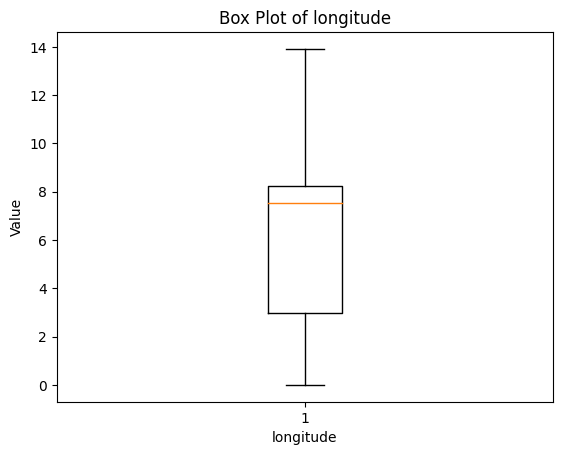

latitude


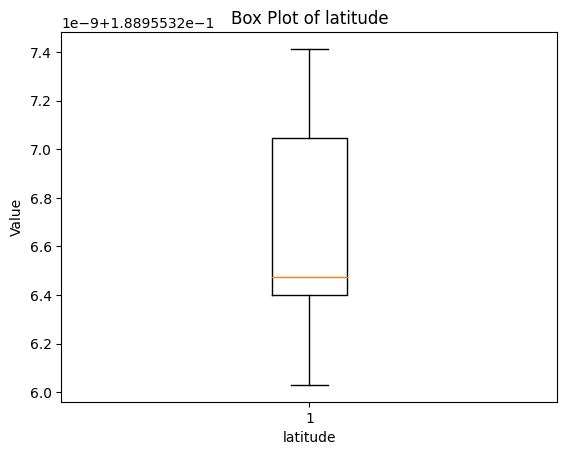

housing_median_age


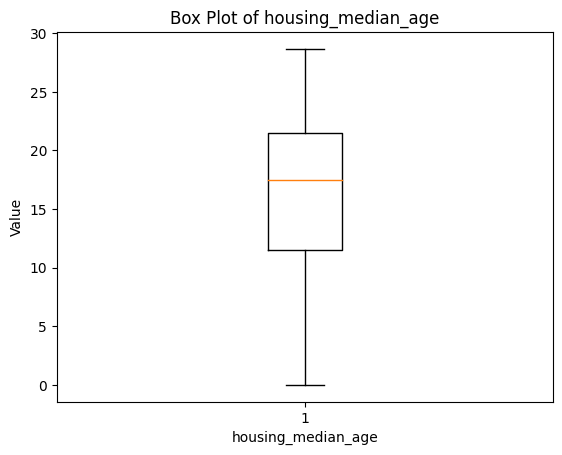

total_rooms


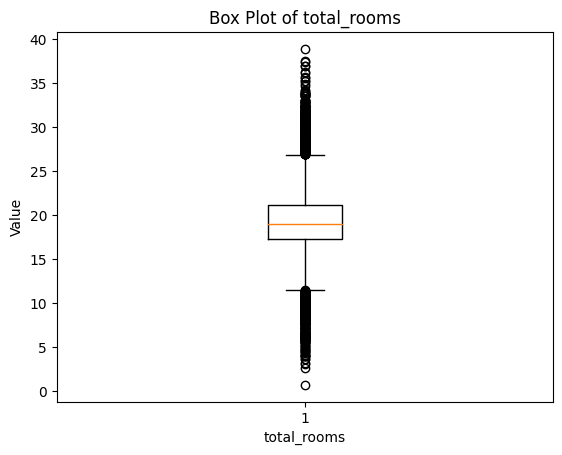

total_bedrooms


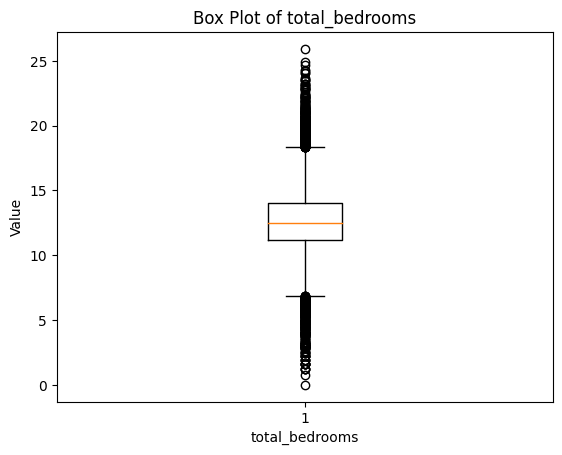

population


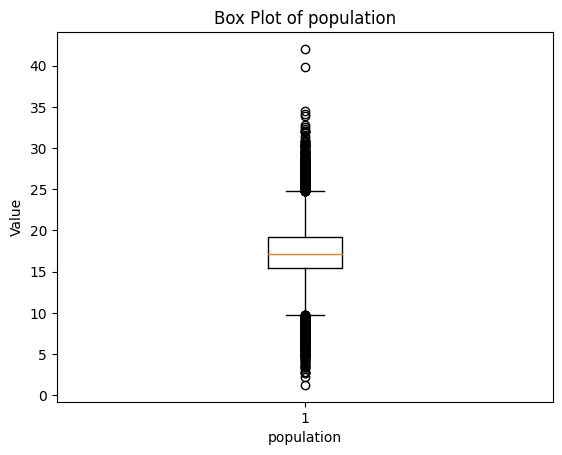

households


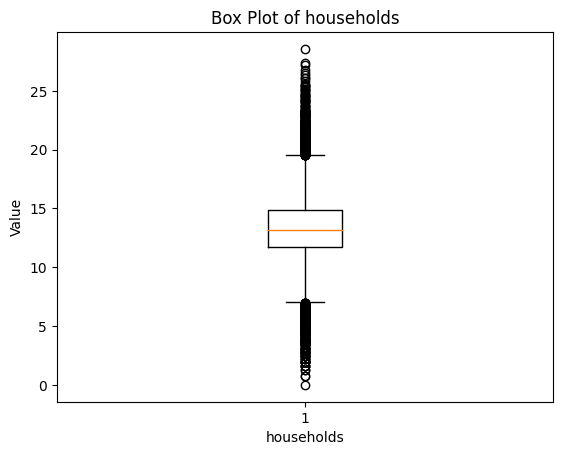

median_income


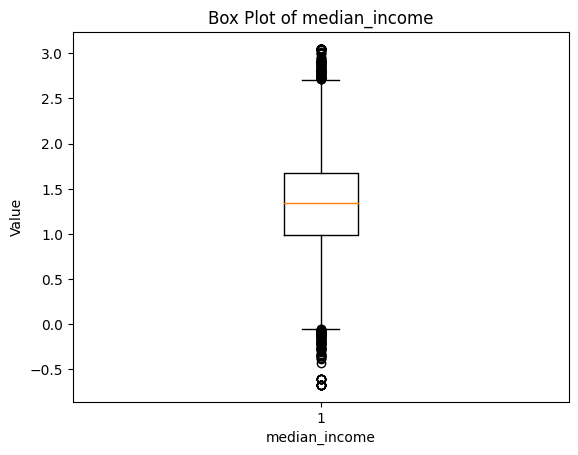

median_house_value


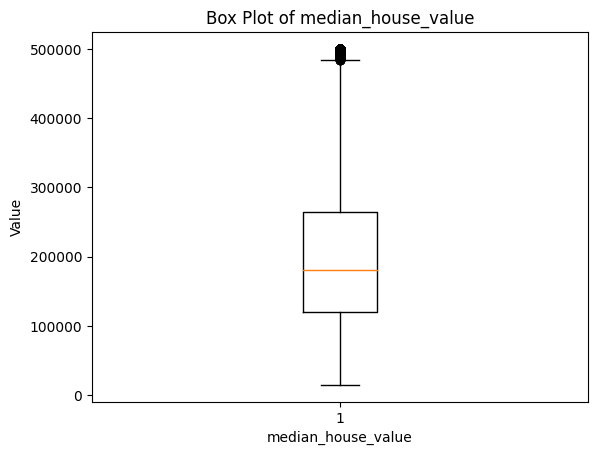

In [ ]:
# Box Plot
for column in housing_boxcox.columns:
    plt.figure()
    print(column)
    plt.boxplot(housing_boxcox[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
    plt.show()

In [ ]:
# check for multicollinearity

# # Create a scatter matrix
# scatter_matrix(housing_boxcox , alpha=0.8, figsize=(8, 8), diagonal='kde')
# plt.show()

In [ ]:
# dropping median_house_value
housing_ind = housing_boxcox.drop("median_house_value", axis=1)
print(housing_ind.head())
housing_dep = housing_boxcox["median_house_value"]
print("Median Housing Values")
print(housing_dep.head())

# splitting the dataset into 80% train and 20% test dataset
X_train, X_test, y_train, y_test = train_test_split(housing_ind, housing_dep, test_size=0.2, random_state=42)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  13.916368  0.188955            9.747852    24.476230       16.973859   
1  13.661249  0.188955           12.051594    26.445080       18.877168   
2  13.518065  0.188955           10.912964    14.221512        9.434279   
3  13.502170  0.188955            9.154072    17.393419       11.581086   
4  13.502170  0.188955           12.612041    17.245665       11.465901   

   population  households  median_income  
0   16.530012   13.779088       0.408208  
1   17.035259   13.697933       0.614564  
2   11.902127    8.751391       0.512312  
3   13.576963   10.921069       1.220598  
4   14.367701   11.455876       0.673768  
Median Housing Values
0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64


Feature 0: 30.774287
Feature 1: 0.462666
Feature 2: 144.338609
Feature 3: 366.244458
Feature 4: 38.235034
Feature 5: 10.667124
Feature 6: 73.566977
Feature 7: 10420.070088


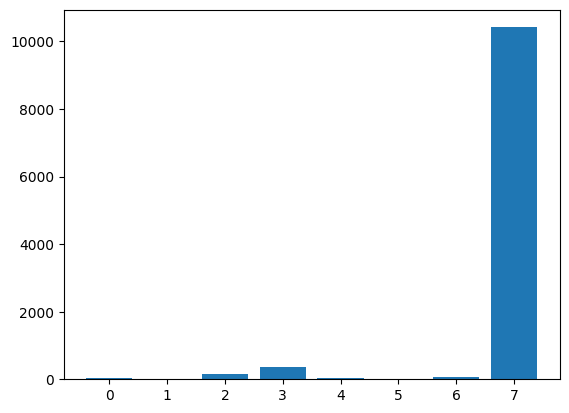

In [ ]:
# Feature selection using SelectKBest and F-values
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# what are scores for the features
for i in range(len(selector.scores_)):
 print('Feature %d: %f' % (i, selector.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()


In [ ]:
# Linear Regression with ALL features
linearRegModel = LinearRegression()
linearRegModel.fit(X_train_selected, y_train)

# Make predictions
y_pred = linearRegModel.predict(X_test_selected)

# Evaluate the model
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score for y_pred: ", r2_score(y_pred, y_test))



# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values (Linear Reg + ALL Features Selected)")
# plt.show()


Mean Squared Error:  78868.0209925005
R2 score for y_pred:  0.10505230420824663


In [ ]:
# Linear Regression with Selected Features
from sklearn.feature_selection import SelectKBest, f_regression

# Perform feature selection using ANOVA
k_features = 8  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Print selected feature indices
print("Selected Feature Indices:", selected_feature_indices)

# Fit a linear regression model using the selected features
linearRegModel = LinearRegression()
linearRegModel.fit(X_train_selected, y_train)

# Make predictions
y_pred = linearRegModel.predict(X_test_selected)

# Evaluate the model
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score for y_pred: ", r2_score(y_pred, y_test))



# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values (Linear Reg Using Anova)")
# plt.show()

Selected Feature Indices: [0 1 2 3 4 5 6 7]
Mean Squared Error:  70509.67068144682
R2 score for y_pred:  0.3931744684420573


In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
degree = 3  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model
linearRegModel = LinearRegression()
linearRegModel.fit(X_train_poly, y_train)

# Make predictions
y_pred = linearRegModel.predict(X_test_poly)

# Evaluate the model
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score for y_pred: ", r2_score(y_pred, y_test))



# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values (Polynomial Regression)")
# plt.show()

Mean Squared Error:  58426.19137393531
R2 score for y_pred:  0.676687400166563


In [ ]:
# Polynomial Regression + Anova
degree = 4  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Perform feature selection using ANOVA
k_features = 50  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k_features)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Print selected feature indices
print("Selected Feature Indices:", selected_feature_indices)

# Fit a linear regression model using the selected features
linearRegModel = LinearRegression()
linearRegModel.fit(X_train_selected, y_train)

# Make predictions
y_pred = linearRegModel.predict(X_test_selected)

# Evaluate the model
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 score for y_pred: ", r2_score(y_pred, y_test))

# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values (PolyReg + Anova)")
# plt.show()

Selected Feature Indices: [  8  23  34  38  43  44  87  98 102 107 108 119 123 128 129 144 154 160
 163 164 291 302 306 311 312 323 327 332 333 348 358 364 367 368 394 398
 403 404 414 420 423 424 439 449 458 459 479 489 493 494]
Mean Squared Error:  65900.32250735853
R2 score for y_pred:  0.525359522875718


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [ ]:
# Linear Regression with StandardScaler (Scaling Numerical Features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain scaled numerical features

# Perform feature selection using SelectKBest and F-values on scaled features
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Fit a linear regression model using the selected features
linearRegModel = LinearRegression()
linearRegModel.fit(X_train_selected, y_train)

# Make predictions
y_pred = linearRegModel.predict(X_test_selected)

# Evaluate the model
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score for y_pred: ", r2_score(y_pred, y_test))

# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values (Linear Reg + Scaled Features)")
# plt.show()

Mean Squared Error:  80664.23494861704
R2 score for y_pred:  0.016983290672380247


In [ ]:
# Polynomial Regression + StandardScale

# Generate polynomial features
degree = 3  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Fit a linear regression model
linearRegModel = LinearRegression()
linearRegModel.fit(X_train_poly_scaled, y_train)

# Make predictions
y_pred = linearRegModel.predict(X_test_poly_scaled)

# Evaluate the model
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score for y_pred: ", r2_score(y_pred, y_test))

# # Plot the actual vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")
# plt.title("Actual vs. Predicted values (Polynomial Regression + StandardScale)")
# plt.show()

Mean Squared Error:  58385.293389740706
R2 score for y_pred:  0.6771209127405858
